In [1]:
# imports
from src.data.utils import gedi_utils
from src.data.pipelines.extract_gedi_data import SIERRAS_GEDI_ID_COLUMNS, SEKI_GEDI_ID_COLUMNS, SIERRAS_GEDI_ALL_COLUMNS, SEKI_GEDI_ALL_COLUMNS
from src.data.gedi import gedi_loader
from src.constants import GEDI_INTERMEDIATE_PATH, INTERMEDIATE_RESULTS
from fastai.tabular.all import load_pickle, save_pickle
from src.data.processing import severity_overlay as se
from src.data.processing import raster_overlays as ro
from src.data.adapters import calfire_perimeters as cp
from src.data.pipelines import run_overlays as overlays
from src.data.adapters import mtbs as mtbs_adapter
from src.data.pipelines import aggregate_analysis as aa
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette="Set2")
palette = sns.color_palette("Set2")

import pandas as pd

import importlib
importlib.reload(se)
importlib.reload(ro)
importlib.reload(gedi_utils)
importlib.reload(aa)

2024-01-22 20:47:18,448 DEBUG: Logger /home/jk871/fire-regen/src/data/utils/raster.py already set up. [in get_logger at /home/jk871/fire-regen/src/utils/logging_util.py:51]
2024-01-22 20:47:18,762 DEBUG: Logger /home/jk871/fire-regen/src/data/processing/severity_overlay.py already set up. [in get_logger at /home/jk871/fire-regen/src/utils/logging_util.py:51]
2024-01-22 20:47:18,765 DEBUG: Logger /home/jk871/fire-regen/src/data/processing/raster_overlays.py already set up. [in get_logger at /home/jk871/fire-regen/src/utils/logging_util.py:51]


<module 'src.data.pipelines.aggregate_analysis' from '/home/jk871/fire-regen/src/data/pipelines/aggregate_analysis.py'>

In [2]:
def get_output_path(file_name: str):
    return f"{aa.PIPELINES_PATH}/{file_name}"

In [3]:
df_in = load_pickle(get_output_path("severity_aggregated_info.pkl"))

In [6]:
burned = df_in[df_in.YSF > 0]
unburned = df_in[df_in.YSF < 0]

(-100.0, 800.0)

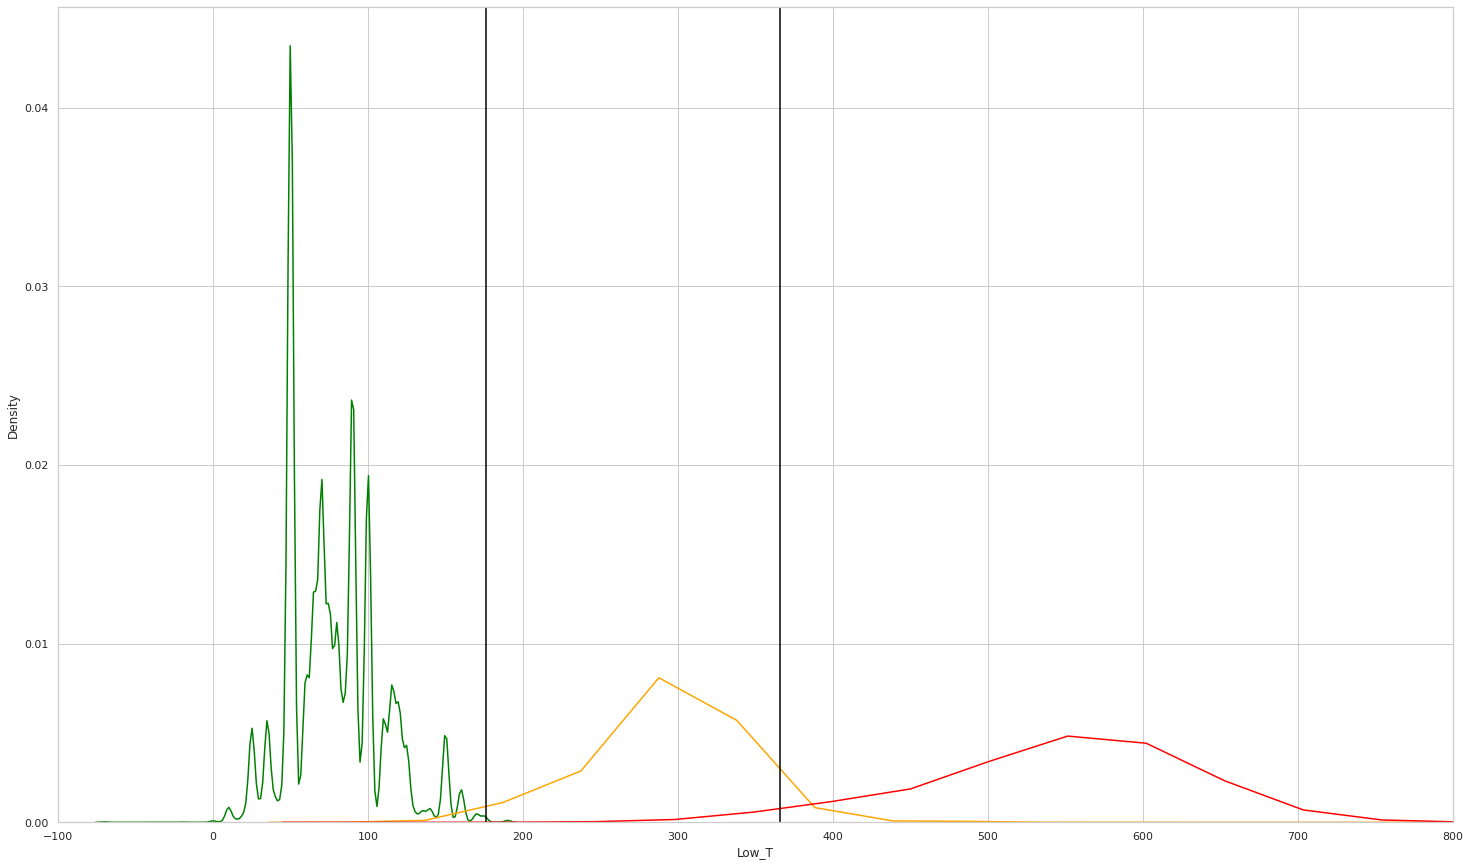

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
sns.kdeplot(burned, x="Low_T", color="green")
sns.kdeplot(burned, x="Mod_T", color="orange")
sns.kdeplot(burned, x="High_T", color="red")
ax.axvline(176, color="black")
ax.axvline(366, color="black")
ax.set_xlim((-100, 800))

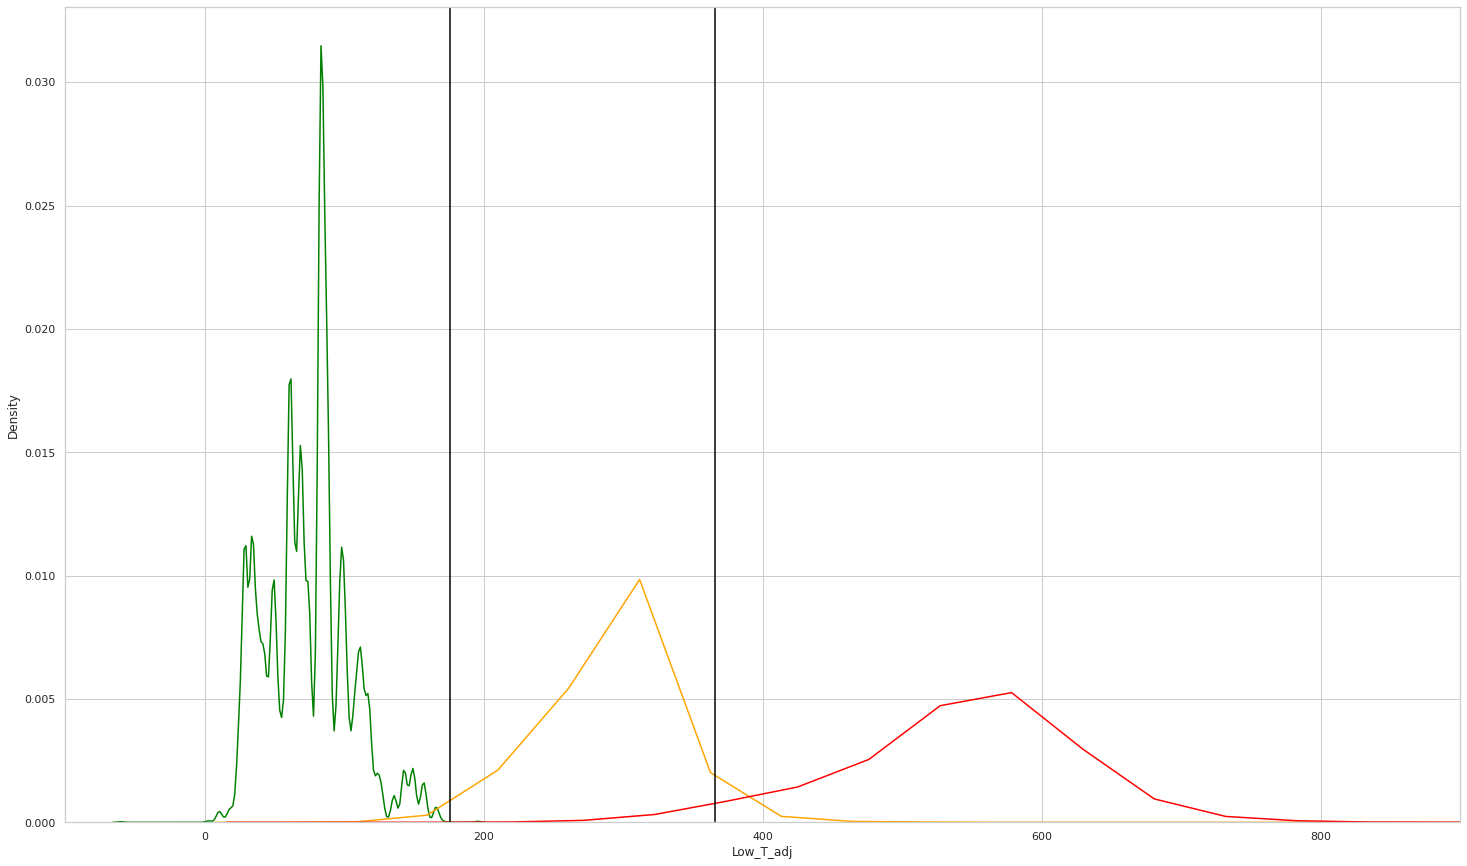

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
sns.kdeplot(burned, x="Low_T_adj", color="green")
sns.kdeplot(burned, x="Mod_T_adj", color="orange")
sns.kdeplot(burned, x="High_T_adj", color="red")
ax.set_xlim((-100, 900))
ax.axvline(176, color="black")
ax.axvline(366, color="black")